# Random variables

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
from scipy import stats

In [3]:
dist = stats.norm(100, 15)

In [4]:
xs = np.linspace(50, 150, 100)

### PDF

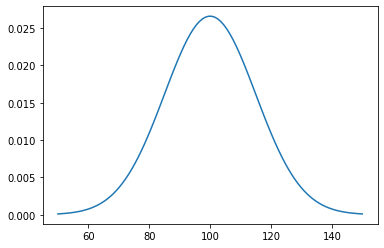

In [5]:
plt.plot(xs, dist.pdf(xs))
pass

### CDF

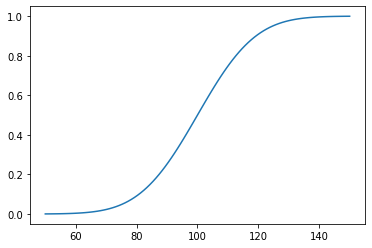

In [6]:
plt.plot(xs, dist.cdf(xs))
pass

In [7]:
xs = np.linspace(0, 1, 100)

### Quantiles

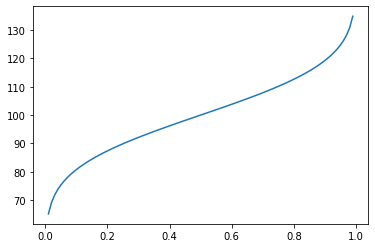

In [8]:
plt.plot(xs, dist.ppf(xs))
pass

### Random variables

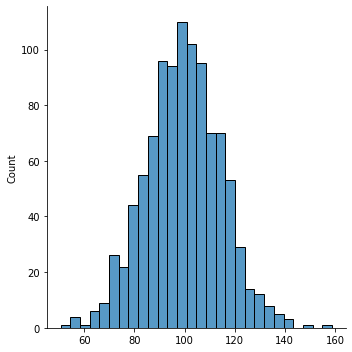

In [9]:
n = 1000
sns.displot(dist.rvs(n), kind='hist')
pass

### Simulation

In [10]:
n = 1_000_000
iqs = dist.rvs(n)

Proportion with values less than or equal to 120

In [11]:
dist.cdf(120)

0.9087887802741321

In [12]:
np.mean(iqs <= 120)

0.908532

Value at 90th percentile

In [13]:
dist.ppf(0.9)

119.22327348316901

In [14]:
np.sort(iqs)[int(0.9*n)]

119.23879086271768

### Log likelihood

In [15]:
xs = np.random.normal(3, 1, 10)

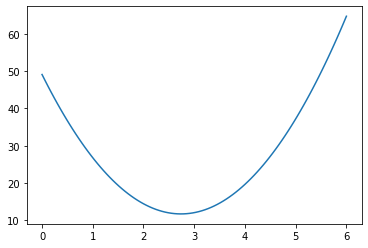

In [16]:
mus = np.linspace(0, 6, 100)

@np.vectorize
def negloglik(mu, xs=xs):
    return -stats.norm.logpdf(xs, mu, scale=1).sum()

plt.plot(mus, negloglik(mus))
pass

### MLE

In [17]:
import scipy.optimize as opt

In [18]:
opt.minimize_scalar(negloglik, (0, 6)) 

     fun: array(11.63955359)
    nfev: 9
     nit: 5
 success: True
       x: 2.738719425446029

The `fit` method performs MLE

In [19]:
μ, σ = stats.norm.fit(xs, fscale=1)

In [20]:
μ, σ

(2.738719425446031, 1)

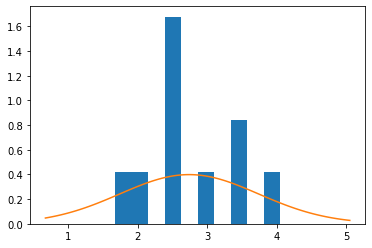

In [21]:
x = np.linspace(xs.min()-1, xs.max()+1, 100)
plt.hist(xs, density=True)
plt.plot(x, stats.norm(μ, σ).pdf(x))
pass

### Confidence intervals

In [22]:
α = stats.norm(0, 1).ppf([0.95])

In [23]:
np.r_[μ - α*σ, μ + α*σ]

array([1.0938658 , 4.38357305])

In [24]:
stats.norm(μ, σ).interval(0.9)

(1.0938657984945581, 4.383573052397503)